# Machine Learning course@K

In [3]:
import pandas as pd

main_file_path = '../input/house-prices-advanced-regression-techniques/train.csv' # this is the path to the Iowa data that you will use
data = pd.read_csv(main_file_path)

# Run this code block with the control-enter keys on your keyboard. Or click the blue botton on the left
#print('Some output from running this cell')

print(data.describe())

+ above we observe col[0] can be formula to applied!

## Show all columns' name

+ By: columns property of the DataFrame 

In [4]:
print(data.columns)

## Select a column
+ pull out a col by **dot-notation** on data
+ input: dataset from panda csv
+ output: **a Series** (i.e. a dataframe with 1 column, ~vector)

In [5]:
data2 = data.SaleCondition
print(data2.head())    #head must be a function, not dot-notataed

## Select multiple columns

In [13]:
col_of_interest = ['LotArea', 'SalePrice']
two_col_of_data = data[col_of_interest]   #pd: allow index be a list of col names
two_col_of_data.describe()  # describe(): form a table

## Build a model: DecisionTreeRegressor

In [20]:
data3 = ['Condition1', 'Condition2']
data3 = data[data3]
data3.describe()

In [39]:
y = data.SalePrice
y.describe()

In [34]:
# Step1: choose the prediction target
y = data.SalePrice   # select mean,std,min,quartiles,max of 'SP' col

# Step2: choose predicators

# predicators = ['YearBuilt', 'Condition1', 'Condition2']
# predicators error: cannot convert string to float
# You have categorical data, but your model needs something numerical. 
# See our one hot encoding tutorial for a solution.

# 2 steps building your input data
predicators = ['YearBuilt', 'LotArea', 'YrSold']  #specify the column
X = data[predicators]   #extract data accord. cols selected above

### <span style="color:red"> !! the predicator can be categorial instead of numberic </span>
+ how can we turn categorial data into numeric data, so as to feed into model?
+ see **one-hot encoding** tutorial

In [35]:
from sklearn.tree import DecisionTreeRegressor
# Define model
model = DecisionTreeRegressor()   #Decision Tree with continuous decision 
model.fit(X,y)

In [37]:
print("Making predictions for the following 5 houses:")
print(X.head())  #col: YearBuilt, LotArea and YrSold
print("The predictions are")
print(model.predict(X.head()))

# Training Summary
+ load data: by selecting a column or multiple columns
+ intialize X,y likewise
+ choose the estimator for the model
+ train the model by calling fit()
+ call predict() on new samples 


## Model Validation: Mean Absolute Error

In [48]:
# visualize the data
print(X)   #show the entire table
print(X.columns.size)  #show number of columns
# print(X.rows.size)   #non-exist
print(X.size)    #row*col
print(X.shape)   #(row, col) tuple

In [41]:
from sklearn.metrics import mean_absolute_error

predicted = model.predict(X)
mean_absolute_error(y, predicted)

## Side-notes
+ predictor list determines which data field is used for the prediction
+ predictor bears **No** responsibility for relation between itself and the prediction
+ E.g. Color of house actually bears no relation to the prediction of Sales Price, but it's picked as parameter for the model; 
+ Example above is dangerous: model may work well in this particular data set, but does poorly in prediction of new samples, yielding high test error. (Given this parameter intrinsically bears no relation with sale price).

## Model Testing: Validation data
* the true power of a model lies on its predictive power, not the fitting power to the current dataset

In [51]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=0)
# train_test_split(): return diff data in sequence
# only 20% of dataset used as testing set
# random_state: use 0 as the seed to randomize sample selection
model.fit(train_X, train_y)
#In the following, use the reserved 20%
val_predictions = model.predict(test_X)  
print(mean_absolute_error(test_y, val_predictions))

## The Decision Tree Model
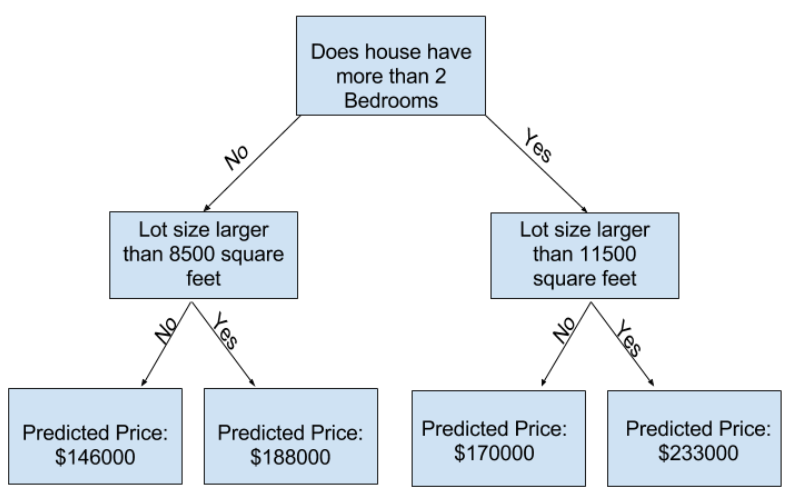

## Problem with tree too deep
+ overfitting: as depth of tree increases, fewer samples at node, undermining predictive power
+ shallow tree increases generative power; But potentially underfit
+ underfit model even performs poorly on training data
+ In short, more leaf nodes may hint overfitting

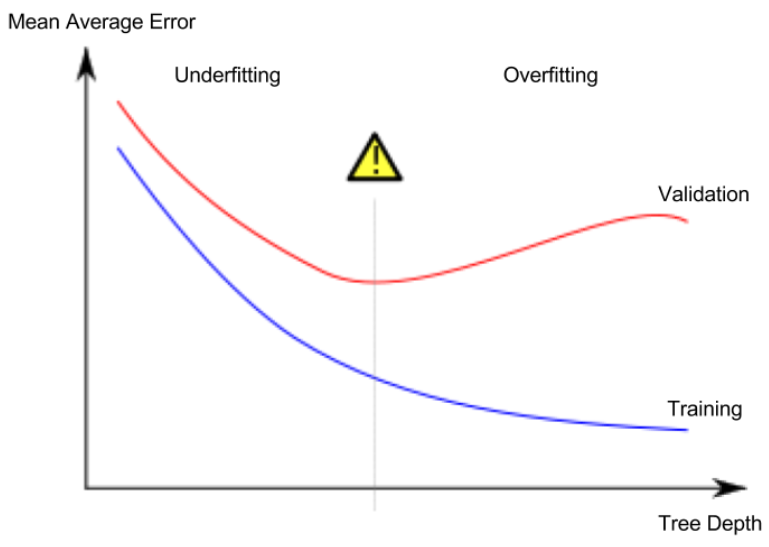

## Trees with Different Heights

In [52]:
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model2 = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [53]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5,50,500,5000]:
    my_mae=get_mae(max_leaf_nodes,train_X,test_X,train_y,test_y)
    print("Max leaf nodes: %d \t\t MAE: %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5 		 MAE: 50988
Max leaf nodes: 50 		 MAE: 51347
Max leaf nodes: 500 		 MAE: 48817
Max leaf nodes: 5000 		 MAE: 49109


#### Observation
+ the # of nodes most minimize the error may not be the smallest # (underfitting)

## Conclusion

+ **Overfitting**: capturing spurious patterns that **won't recur in the future**, leading to less accurate predictions  

+ **Underfitting: failing to capture relevant patterns**, again leading to less accurate predictions.
